In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carregar os dados

In [49]:
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [50]:
# Remover colunas desnecessárias (id)
# axis = 1 -> mudança no eixo x
# inplace -> realizar a mudança diretamente no array original
df_colesterol.drop(columns=['Id'], axis=1 ,inplace=True)

In [51]:
# Renomear e padronizar os nomes das colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [52]:
# Copiar DataFrame para DataFrame EDA
df_colesterol_eda = df_colesterol.copy()
# Copiar DataFrame para DataFrame Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### EDA

In [53]:
# Detectar Valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [54]:
# Medidas estatísticas do DataFrame
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [55]:
# Coletar medidas das variáveis categoricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [56]:
# Coletar medidas das variáveis numericas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [57]:
# Inputar valores ausentes
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sang[0],
                                'fumante': moda_fumante[0],
                                'nivel_atividade_fisica': moda_nivel_atividade[0],
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [58]:
# Converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

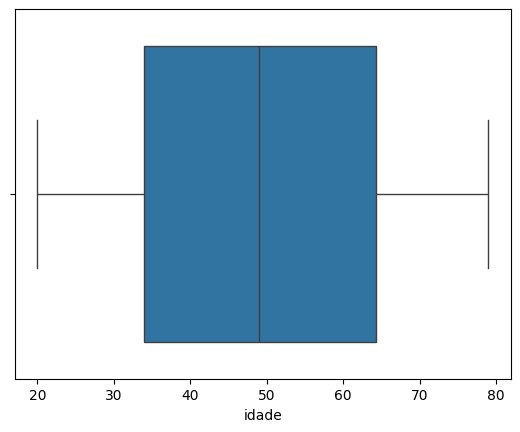

In [79]:
# Verificar / detectar outliers - idade
sns.boxplot(data=df_colesterol_eda, x='idade')
plt.show()

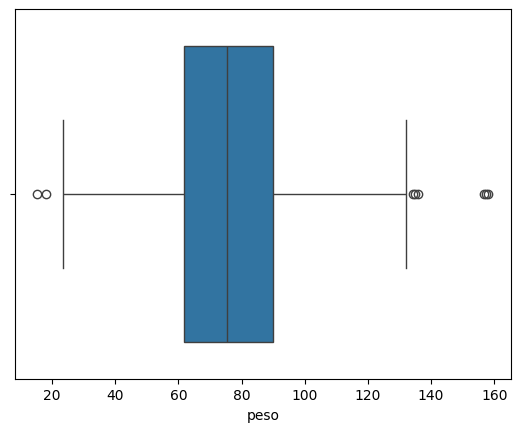

In [82]:
# Verificar / detectar outliers - peso
sns.boxplot(data=df_colesterol_eda, x='peso')
plt.show()